In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
sns.set()
import re #regular expressions
import datetime
import csv

In [2]:
df=pd.read_csv(r'C:\Users\HP\Desktop\flowster_attributes.csv')
df.head()

,Topic_Title,Category,Tags,Author,Commenters,Leading_Comment,Other_Comments,Likes,Views
0,About the Product Sourcing Category,Product Sourcing,[],Trent-Admin,[],Have questions about sourcing products? This i...,[],0,0
1,Price Checker 2 - Competitor storefront extrac...,Product Sourcing,[],MoniqueAndKerry,['Mitch'],Hi! We are new to the forum and are going thro...,['Yes you will need the paid version. Options...,0,24
2,Top 10 Tips to Grow your Business Rapidly,Product Sourcing,['Purchasing'],Pradimna_Kumar,[],As I am working in Amazon as a seller from las...,[],0,0
3,Virtual Assistants,Product Sourcing,[],JimW_PB,"['Rebca', 'McDavid', 'Mitch']","Does anyone have a VA they recommend, have use...",['@McDavid Most don’t want to share any stella...,0,147
4,Can you sell branded products on Amazon uk,Product Sourcing,['Sourcing Brand Name Products'],Mitch,['Rameksuya'],Can you sell branded products on Amazon Uk or ...,['You can sell on Amazon UK as well. It could...,0,73


with open(r'C:\Users\HP\Desktop\.flowster_attributes.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

In [170]:
#checking word count
df['word_count'] = df['Leading_Comment'].apply(lambda x: len(str(x).split(" ")))
df[['Leading_Comment','word_count']].head()

,Leading_Comment,word_count
0,Have questions about sourcing products? This i...,23
1,Hi! We are new to the forum and are going thro...,63
2,As I am working in Amazon as a seller from las...,81
3,"Does anyone have a VA they recommend, have use...",16
4,Can you sell branded products on Amazon Uk or ...,15


def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['Leading_Comment'].apply(lambda x: avg_word(x))
df[['Leading_Comment','avg_word']].head()

In [3]:
df.isna().sum()

Topic_Title        0
Category           0
Tags               0
Author             0
Commenters         0
Leading_Comment    1
Other_Comments     0
Likes              0
Views              0
dtype: int64

In [4]:
#to replace the empty leading comment with NaN
df['Leading_Comment'].replace('  ', np.nan, inplace=True)

In [5]:
#to drop the empty leading comment
df= df.dropna(subset=['Leading_Comment'])

In [6]:
#check if it worked
df.isna().sum()

Topic_Title        0
Category           0
Tags               0
Author             0
Commenters         0
Leading_Comment    0
Other_Comments     0
Likes              0
Views              0
dtype: int64

In [252]:
df.describe()

,Likes,Views
count,260.000000,260.000000
mean,1.315385,164.130769
std,2.348201,125.216069
min,0.000000,0.000000
25%,0.000000,102.500000
50%,1.000000,147.000000
75%,2.000000,212.250000
max,19.000000,730.000000


mean no. of views:164.13 but mean no of likes:1.31 only


max no of views:730
but max no of likes:19 only

In [253]:
df.describe(include=['object']) 

,Topic_Title,Category,Tags,Author,Commenters,Leading_Comment,Other_Comments
count,260,260,260,260,260,260,260
unique,260,12,34,73,125,260,216
top,Selling books,Flowster-specific,[],Kane,[],Have questions about Store & Website Managemen...,[]
freq,1,59,116,51,47,1,45


there are 33 unique tags and 73 unique authors
top category is flowster specific
top author is Kane
there are 260 unique leading comments and 215 unique other comments
ignore tags, commenters, other commenters 

In [121]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['Leading_Comment'].apply(lambda x: avg_word(x))d
df[['Leading_Comment','avg_word']]

,Leading_Comment,avg_word
0,Have questions about sourcing products? This i...,5.434783
1,Hi! We are new to the forum and are going thro...,4.781250
2,As I am working in Amazon as a seller from las...,5.076087
3,"Does anyone have a VA they recommend, have use...",4.687500
4,Can you sell branded products on Amazon Uk or ...,3.800000
...,...,...
256,"Hello,\nDoes anyone have any advise on how to ...",4.541667
257,What accounting software does everyone use?\nI...,5.047619
258,Have questions about sourcing the various sale...,5.310345
259,"If I am posting this in the wrong place, my ap...",4.011111


In [122]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}
# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['Leading_Comment']=df['Leading_Comment'].apply(lambda x:expand_contractions(x))

need to personalize

In [31]:
!pip install nltk

In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [175]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [124]:
stop[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [176]:
df['stopwords'] = df['Leading_Comment'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Leading_Comment','stopwords']].head()

,Leading_Comment,stopwords
0,Have questions about sourcing products? This i...,10
1,Hi! We are new to the forum and are going thro...,28
2,As I am working in Amazon as a seller from las...,23
3,"Does anyone have a VA they recommend, have use...",7
4,Can you sell branded products on Amazon Uk or ...,6


In [264]:
df['stopwords'] = df['Other_Comments'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Other_Comments','stopwords']].head()

,Other_Comments,stopwords
0,[],0
1,['Yes you will need the paid version. Options...,8
2,[],0
3,['@McDavid Most don’t want to share any stella...,45
4,['You can sell on Amazon UK as well. It could...,14


In [177]:
df['hastags'] = df['Leading_Comment'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['Leading_Comment','hastags']].head()

,Leading_Comment,hastags
0,Have questions about sourcing products? This i...,0
1,Hi! We are new to the forum and are going thro...,0
2,As I am working in Amazon as a seller from las...,0
3,"Does anyone have a VA they recommend, have use...",0
4,Can you sell branded products on Amazon Uk or ...,0


In [178]:
df['hastags'] = df['Leading_Comment'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
df[['Leading_Comment','hastags']].head()

,Leading_Comment,hastags
0,Have questions about sourcing products? This i...,0
1,Hi! We are new to the forum and are going thro...,0
2,As I am working in Amazon as a seller from las...,0
3,"Does anyone have a VA they recommend, have use...",0
4,Can you sell branded products on Amazon Uk or ...,0


df['hastags'] = df['Other_Comments'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
df[['Other_Comments','hastags']].head()

In [179]:
df['upper'] = df['Leading_Comment'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['Leading_Comment','upper']].head()

,Leading_Comment,upper
0,Have questions about sourcing products? This i...,0
1,Hi! We are new to the forum and are going thro...,2
2,As I am working in Amazon as a seller from las...,2
3,"Does anyone have a VA they recommend, have use...",1
4,Can you sell branded products on Amazon Uk or ...,0


In [7]:
df['Leading_Comment'] = df['Leading_Comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Leading_Comment'].head()

0    have questions about sourcing products? this i...
1    hi! we are new to the forum and are going thro...
2    as i am working in amazon as a seller from las...
3    does anyone have a va they recommend, have use...
4    can you sell branded products on amazon uk or ...
Name: Leading_Comment, dtype: object

In [8]:
df['Leading_Comment'] = df['Leading_Comment'].str.replace('[^\w\s]','')
df['Leading_Comment'].head()

0    have questions about sourcing products this is...
1    hi we are new to the forum and are going throu...
2    as i am working in amazon as a seller from las...
3    does anyone have a va they recommend have used...
4    can you sell branded products on amazon uk or ...
Name: Leading_Comment, dtype: object

In [182]:
#df['Leading_Comment'] = df['Leading_Comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#df['Leading_Comment'].head()

0    questions sourcing products category use pleas...
1    hi new forum going product sourcing profession...
2    working amazon seller last 6 years want tips s...
3    anyone va recommend used currently using requi...
4      sell branded products amazon uk must amazon com
Name: Leading_Comment, dtype: object

In [183]:
!pip install textblob

textblob spelling error complete checkup

In [46]:

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [184]:
#from textblob import Word
#df['Leading_Comment'] = df['Leading_Comment'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
#df['Leading_Comment'].head()

0    question sourcing product category use please ...
1    hi new forum going product sourcing profession...
2    working amazon seller last 6 year want tip sel...
3    anyone va recommend used currently using requi...
4       sell branded product amazon uk must amazon com
Name: Leading_Comment, dtype: object

In [185]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
df_vect = tfidf.fit_transform(df['Leading_Comment'])

In [135]:
df_vect

<260x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 5543 stored elements in Compressed Sparse Row format>

In [186]:
print(df_vect)

  (0, 828)	0.35070548092000714
  (0, 72)	0.33745386164523694
  (0, 751)	0.32597478689660164
  (0, 842)	0.29111883136092687
  (0, 927)	0.21234956522857087
  (0, 148)	0.31584952538433236
  (0, 630)	0.20680148777844098
  (0, 797)	0.32597478689660164
  (0, 655)	0.5274856810096503
  (1, 40)	0.17875663024696423
  (1, 348)	0.1488483889984845
  (1, 866)	0.13328590606953722
  (1, 296)	0.21032097101626862
  (1, 565)	0.22564314880763237
  (1, 649)	0.20424025612856564
  (1, 515)	0.1488483889984845
  (1, 56)	0.10482056471138493
  (1, 735)	0.17875663024696423
  (1, 129)	0.23580459689787003
  (1, 258)	0.19407880803832797
  (1, 936)	0.22564314880763237
  (1, 314)	0.1897385999577049
  (1, 578)	0.42064194203253724
  (1, 930)	0.12982568127344377
  (1, 629)	0.1648502468388416
  :	:
  (258, 817)	0.20804825632612384
  (258, 987)	0.1855642844303989
  (258, 675)	0.15771535296117242
  (258, 547)	0.17546709513682218
  (258, 413)	0.10577513465170896
  (258, 260)	0.1232651331307941
  (258, 119)	0.1108038787458323

In [136]:
df.head()

,Topic_Title,Category,Tags,Author,Commenters,Leading_Comment,Other_Comments,Likes,Views,word_count,avg_word,stopwords,hastags,upper
0,About the Product Sourcing Category,Product Sourcing,[],Trent-Admin,[],question sourcing product category use please ...,[],0,0,23,5.434783,10,0,0
1,Price Checker 2 - Competitor storefront extrac...,Product Sourcing,[],MoniqueAndKerry,['Mitch'],hi new forum going product sourcing profession...,['Yes you will need the paid version. Options...,0,24,63,4.781250,28,0,2
2,Top 10 Tips to Grow your Business Rapidly,Product Sourcing,['Purchasing'],Pradimna_Kumar,[],working amazon seller last 6 year want tip sel...,[],0,0,81,5.076087,23,0,2
3,Virtual Assistants,Product Sourcing,[],JimW_PB,"['Rebca', 'McDavid', 'Mitch']",anyone va recommend used currently using requi...,['@McDavid Most don’t want to share any stella...,0,147,16,4.687500,7,0,1
4,Can you sell branded products on Amazon uk,Product Sourcing,['Sourcing Brand Name Products'],Mitch,['Rameksuya'],sell branded product amazon uk must amazon com,['You can sell on Amazon UK as well. It could...,0,73,15,3.800000,6,0,0


have to do all processes for other comment also

In [137]:
tf = (df['Leading_Comment'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf.columns = ['words','tf']
tf

,words,tf
0,product,2
1,pc2,2
2,thanks,1
3,question,1
4,using,1
5,sourcing,1
6,going,1
7,process,1
8,help,1
9,need,1


In [187]:
import numpy as np

for i,word in enumerate(tf['words']):
      tf.loc[i, 'idf'] = np.log(df.shape[0]/(len(df[df['Leading_Comment'].str.contains(word)])))

In [188]:
tf

,words,tf,idf,tfidf
0,product,2,1.401799,2.803597
1,pc2,2,3.768922,7.537844
2,thanks,1,1.923095,1.923095
3,question,1,2.094946,2.094946
4,using,1,1.823012,1.823012
5,sourcing,1,2.788093,2.788093
6,going,1,2.469639,2.469639
7,process,1,2.616243,2.616243
8,help,1,2.126694,2.126694
9,need,1,2.094946,2.094946


In [189]:

tf['tfidf'] = tf['tf'] * tf['idf']

In [190]:
tf

,words,tf,idf,tfidf
0,product,2,1.401799,2.803597
1,pc2,2,3.768922,7.537844
2,thanks,1,1.923095,1.923095
3,question,1,2.094946,2.094946
4,using,1,1.823012,1.823012
5,sourcing,1,2.788093,2.788093
6,going,1,2.469639,2.469639
7,process,1,2.616243,2.616243
8,help,1,2.126694,2.126694
9,need,1,2.094946,2.094946


In [191]:

df.isna().sum()

Topic_Title        0
Category           0
Tags               0
Author             0
Commenters         0
Leading_Comment    0
Other_Comments     0
Likes              0
Views              0
word_count         0
stopwords          0
hastags            0
upper              0
dtype: int64

In [63]:
!pip install \
   pandas matplotlib numpy \
   nltk seaborn sklearn gensim pyldavis \
   wordcloud textblob spacy textstat

corpus=[]
new= df['Leading_Comment'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [193]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
df_bow = bow.fit_transform(df['Leading_Comment'])
df_bow

<260x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 6330 stored elements in Compressed Sparse Row format>

In [194]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

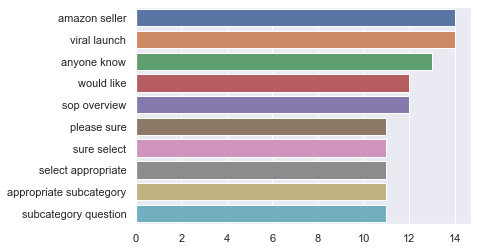

In [195]:
import seaborn as sns

top_n_bigrams=get_top_ngram(df['Leading_Comment'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

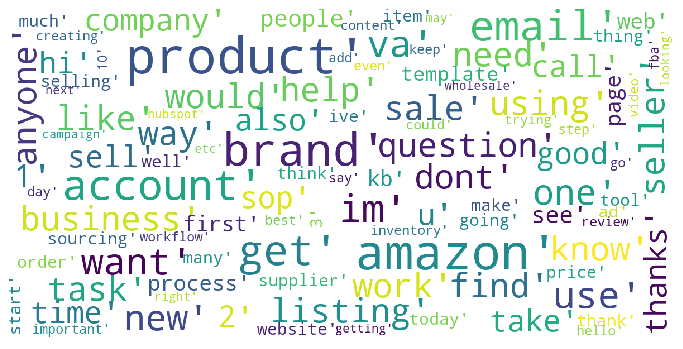

In [196]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

 u needs to be spell checked, im, ive so maybe not remove punctuations 
 numeric needs to be removed

In [75]:
df["Topic_Title"].unique()

array(['About the Product Sourcing Category',
       'Price Checker 2 - Competitor storefront extraction',
       'Top 10 Tips to Grow your Business Rapidly', 'Virtual Assistants',
       'Can you sell branded products on Amazon uk',
       'Price Checker Sales Estimate',
       'Black Box (Amazon Product Research) - yay or nay?',
       'VA’s vs Outbound Call Center',
       'BO’s Contact Info Research Linkedin paid account VA access',
       'Catalogs Analysis Best Practices', 'Selling books',
       'How to remove Amazon from listing?',
       'What do distributors care about?',
       'How do I analyze a price sheet using PC2?',
       'Sending Gmass Emails', 'Brand Contact Us page',
       'Sending Mass email - Gmass', 'WEBS Strikes Again!',
       'VA Scouting Expectation', 'Amazon',
       'WEBS: How do I buy WEBS? (I want to Pay Full amount right away)',
       'Winning new accounts using trade shows',
       'Product Sourcing for Professionals', 'Existing Ads?',
       'Email 

In [76]:
df["Category"].unique()

array(['Product Sourcing', 'Human Resources', 'Amazon Specific',
       'Flowster-specific', 'Software & Tools', 'Fulfillment',
       'Traffic Sources', 'Management', 'Misc Topics',
       'Financial Management', 'eCommerce Marketplaces',
       'Store & Website Management'], dtype=object)

write code that will put the info of category in empty tags

In [78]:
df["Tags"].unique()

array(['[]', "['Purchasing']", "['Sourcing Brand Name Products']",
       "['Vendor Management']", "['Pricing & Negotiation']",
       "['Vendor Relations']", "['Performance Reviews']",
       "['Recruiting']", "['Outsourcing']", "['Managing a Virtual Team']",
       "['Reviews & Customer Service']", "['PPC']",
       "['Inventory Management']", "['All Other Amazon Related Issues']",
       "['Pricing Management']", "['Software & Tools']",
       "['Product Prep']", "['Updates']", "['Free SOPs']",
       "['Marketplace']", "['Shopify']", "['Project Management']",
       "['Standard Operating Procedures']", "['Shipping']",
       "['Third Party Fulfillment']", "['Email Marketing']",
       "['YouTube']", "['All Other Traffic Sources']", "['Leadership']",
       "['Networking & Events']", "['Education & Training']",
       "['Buying or Selling a Business']",
       "['Articles, Books, and Resources']",
       "['Accounting & Bookkeeping']"], dtype=object)

In [197]:
df['Tags'] = df['Tags'].str.replace(r']', '').str.replace(r'[','')
df.head()

,Topic_Title,Category,Tags,Author,Commenters,Leading_Comment,Other_Comments,Likes,Views,word_count,stopwords,hastags,upper
0,About the Product Sourcing Category,Product Sourcing,,Trent-Admin,[],question sourcing product category use please ...,[],0,0,23,10,0,0
1,Price Checker 2 - Competitor storefront extrac...,Product Sourcing,,MoniqueAndKerry,['Mitch'],hi new forum going product sourcing profession...,['Yes you will need the paid version. Options...,0,24,63,28,0,2
2,Top 10 Tips to Grow your Business Rapidly,Product Sourcing,'Purchasing',Pradimna_Kumar,[],working amazon seller last 6 year want tip sel...,[],0,0,81,23,0,2
3,Virtual Assistants,Product Sourcing,,JimW_PB,"['Rebca', 'McDavid', 'Mitch']",anyone va recommend used currently using requi...,['@McDavid Most don’t want to share any stella...,0,147,16,7,0,1
4,Can you sell branded products on Amazon uk,Product Sourcing,'Sourcing Brand Name Products',Mitch,['Rameksuya'],sell branded product amazon uk must amazon com,['You can sell on Amazon UK as well. It could...,0,73,15,6,0,0


In [198]:
df['Commenters'] = df['Commenters'].str.replace(r']', '').str.replace(r'[','')
df.head()

,Topic_Title,Category,Tags,Author,Commenters,Leading_Comment,Other_Comments,Likes,Views,word_count,stopwords,hastags,upper
0,About the Product Sourcing Category,Product Sourcing,,Trent-Admin,,question sourcing product category use please ...,[],0,0,23,10,0,0
1,Price Checker 2 - Competitor storefront extrac...,Product Sourcing,,MoniqueAndKerry,'Mitch',hi new forum going product sourcing profession...,['Yes you will need the paid version. Options...,0,24,63,28,0,2
2,Top 10 Tips to Grow your Business Rapidly,Product Sourcing,'Purchasing',Pradimna_Kumar,,working amazon seller last 6 year want tip sel...,[],0,0,81,23,0,2
3,Virtual Assistants,Product Sourcing,,JimW_PB,"'Rebca', 'McDavid', 'Mitch'",anyone va recommend used currently using requi...,['@McDavid Most don’t want to share any stella...,0,147,16,7,0,1
4,Can you sell branded products on Amazon uk,Product Sourcing,'Sourcing Brand Name Products',Mitch,'Rameksuya',sell branded product amazon uk must amazon com,['You can sell on Amazon UK as well. It could...,0,73,15,6,0,0


In [199]:
df['Other_Comments'] = df['Other_Comments'].str.replace(r']', '').str.replace(r'[','')
df.head()

,Topic_Title,Category,Tags,Author,Commenters,Leading_Comment,Other_Comments,Likes,Views,word_count,stopwords,hastags,upper
0,About the Product Sourcing Category,Product Sourcing,,Trent-Admin,,question sourcing product category use please ...,,0,0,23,10,0,0
1,Price Checker 2 - Competitor storefront extrac...,Product Sourcing,,MoniqueAndKerry,'Mitch',hi new forum going product sourcing profession...,'Yes you will need the paid version. Options ...,0,24,63,28,0,2
2,Top 10 Tips to Grow your Business Rapidly,Product Sourcing,'Purchasing',Pradimna_Kumar,,working amazon seller last 6 year want tip sel...,,0,0,81,23,0,2
3,Virtual Assistants,Product Sourcing,,JimW_PB,"'Rebca', 'McDavid', 'Mitch'",anyone va recommend used currently using requi...,'@McDavid Most don’t want to share any stellar...,0,147,16,7,0,1
4,Can you sell branded products on Amazon uk,Product Sourcing,'Sourcing Brand Name Products',Mitch,'Rameksuya',sell branded product amazon uk must amazon com,'You can sell on Amazon UK as well. It could ...,0,73,15,6,0,0


In [92]:
df['Author'].unique()

array(['Trent-Admin', 'MoniqueAndKerry', 'Pradimna_Kumar', 'JimW_PB',
       'Mitch', 'zaid', 'Daniel_Folkmanas', 'Cameron.B', 'Adrian',
       'Dennis_Scheurich', 'Ivan', 'WillCompere', 'twentyfoursevenagent',
       'BobG', 'LizD', 'Ketsaal', 'Kane', 'APlusSeller', 'Wayne', 'Ben',
       'grant', 'Laura', 'Chris_Bell', 'angie', 'Matoskah', 'MBahe',
       'qqmixx', 'Ibrahim_Bagasrawala', 'scottschmitz', 'MattB', 'Dennis',
       'Blue', 'dast1983', 'Brandon_Bouchereau', 'gianmeliShanghai',
       'steph', 'Thomas1985', 'chcsteele9', 'Rebca', 'randy1', 'watson',
       'MaRa', 'D.Jin', 'Josie', 'Rick', 'Kwon', 'Janeen',
       'curiousgoodsshop', 'system', 'Kevin', 'JJH228', 'Coolal',
       'rayoxo', 'Phong_Tran', 'debi_zyx', 'Malessa', 'jims', 'EBF',
       'Mac', 'mricozzi104', 'ridethewave', 'terrifetters', 'Milt',
       'Dwtarbe', 'MrFinnJ', 'laserdad', 'mtprep', 'McDavid', 'Vision',
       'Bruce_MacDonald', 'VonT', 'Lazar', 'BetterLifeSales'],
      dtype=object)

In [201]:
df['Commenters'].unique()

array(['', "'Mitch'", "'Rebca', 'McDavid', 'Mitch'", "'Rameksuya'",
       "'xinod14'", "'zaid', 'LizD', 'Kane', 'Themachine', 'Mitch'",
       "'Mitch', 'gianmeliShanghai'", "'Mitch', 'LizD'",
       "'Ben', 'D.Jin', 'LizD'", "'LizD'", "'EdS'",
       "'Randall', 'Trent-Admin', 'WillCompere'", "'WillCompere'",
       "'Mac', 'Trent-Admin', 'uncleusa'",
       "'Emuran', 'Josie', 'Trent-Admin'",
       "'dstdllc', 'jdsechrest', 'Mitch', 'BBSmith'", "'Cameron.B'",
       "'andrew', 'Cameron.B'", "'KeithH'",
       "'jwt1000', 'Trent-Admin', 'Cameron.B', 'Warren_Carter'", "'Ben'",
       "'Trent-Admin'", "'gianmeliShanghai', 'BetterLifeSales'",
       "'mshayanh13', 'lbeaulieu', 'Trent-Admin', 'terrifetters', 'Terri_Mallozzi', 'Mitch'",
       "'mshayanh13'", "'mshayanh13', 'Trent-Admin', 'Christine_M'",
       "'classic', 'Trent-Admin'",
       "'Ibrahim_Bagasrawala', 'Mitch', 'edsutton'",
       "'Steve', 'mshayanh13'", "'Laura', 'MBahe'",
       "'Pauline', 'mshayanh13'", "'jwt1000', 

In [202]:
print(df.isnull().sum())

Topic_Title        0
Category           0
Tags               0
Author             0
Commenters         0
Leading_Comment    0
Other_Comments     0
Likes              0
Views              0
word_count         0
stopwords          0
hastags            0
upper              0
dtype: int64


In [9]:
df = df.replace(r'^\s*$2@', np.nan, regex=True)

In [10]:
df.head()

,Topic_Title,Category,Tags,Author,Commenters,Leading_Comment,Other_Comments,Likes,Views
0,About the Product Sourcing Category,Product Sourcing,[],Trent-Admin,[],have questions about sourcing products this is...,[],0,0
1,Price Checker 2 - Competitor storefront extrac...,Product Sourcing,[],MoniqueAndKerry,['Mitch'],hi we are new to the forum and are going throu...,['Yes you will need the paid version. Options...,0,24
2,Top 10 Tips to Grow your Business Rapidly,Product Sourcing,['Purchasing'],Pradimna_Kumar,[],as i am working in amazon as a seller from las...,[],0,0
3,Virtual Assistants,Product Sourcing,[],JimW_PB,"['Rebca', 'McDavid', 'Mitch']",does anyone have a va they recommend have used...,['@McDavid Most don’t want to share any stella...,0,147
4,Can you sell branded products on Amazon uk,Product Sourcing,['Sourcing Brand Name Products'],Mitch,['Rameksuya'],can you sell branded products on amazon uk or ...,['You can sell on Amazon UK as well. It could...,0,73


modifiedDf=df.fillna("NaN")


In [165]:
print(modifiedDf.isnull().sum())

Topic_Title        0
Category           0
Tags               0
Author             0
Commenters         0
Leading_Comment    0
Other_Comments     0
Likes              0
Views              0
word_count         0
avg_word           0
stopwords          0
hastags            0
upper              0
cleaned            0
dtype: int64


df = df.apply(lambda x: np.nan if isinstance(x, str) and (x.isspace() or not x) else x)

To replace empty strings or strings of entirely spaces

In [206]:
df.head()

,Topic_Title,Category,Tags,Author,Commenters,Leading_Comment,Other_Comments,Likes,Views,word_count,stopwords,hastags,upper
0,About the Product Sourcing Category,Product Sourcing,NaN,Trent-Admin,NaN,question sourcing product category use please ...,NaN,0,0,23,10,0,0
1,Price Checker 2 - Competitor storefront extrac...,Product Sourcing,NaN,MoniqueAndKerry,'Mitch',hi new forum going product sourcing profession...,'Yes you will need the paid version. Options ...,0,24,63,28,0,2
2,Top 10 Tips to Grow your Business Rapidly,Product Sourcing,'Purchasing',Pradimna_Kumar,NaN,working amazon seller last 6 year want tip sel...,NaN,0,0,81,23,0,2
3,Virtual Assistants,Product Sourcing,NaN,JimW_PB,"'Rebca', 'McDavid', 'Mitch'",anyone va recommend used currently using requi...,'@McDavid Most don’t want to share any stellar...,0,147,16,7,0,1
4,Can you sell branded products on Amazon uk,Product Sourcing,'Sourcing Brand Name Products',Mitch,'Rameksuya',sell branded product amazon uk must amazon com,'You can sell on Amazon UK as well. It could ...,0,73,15,6,0,0


In [96]:
df['Leading_Comment'].unique()

array(['question sourcing product category use please sure select appropriate subcategory question',
       'hi new forum going product sourcing professional sop question product extraction workflow process using pc2 downloaded free version doesnt button say amazon browsersearches need purchase full pc2 package get feature thanks help advance',
       'working amazon seller last 6 year want tip selling growing business fastly like grow business tip please read carefully top 10 amazon selling tip optimize product detail search use competitive pricing take professional product image try buy box work continually improve performance consider using fulfillment amazon follow amazon rule leverage product review advantage make customer service top priority manage amazon inventory proactively',
       'anyone va recommend used currently using require work',
       'sell branded product amazon uk must amazon com',
       'hi yall still using pc2 extracting storefront look like number way est mon

im, ive, scanunlimited, rare words need to be eliminated

In [105]:
df['Other_Comments'].unique() #caution:lowercase and other preprocessing of other comments has not been done till now

array([nan,
       "'Yes you will need the paid version.  Options for extraction tools include PC2, Tactical Arbitrage, and Helium10.  All require a paid version to run at scale.'",
       "'@McDavid Most don’t want to share any stellar VA they are currently using.  The best thing would be to hit the VA hiring websites such as onlinejobs.ph.  Have 3 or so run a task and see which results are the best.  If two do similarly well, hire both part time and promote whichever one you prefer to full time after a month or so.', '@McDavid other than onlinejobs.ph, we’ve also had luck with goLance and UpWork! There’s a ton of good VAs out there, but it can sometimes take a bit of time to find them. Mitch’s advice is great.', 'Hi McDavid, message me on facebook https://www.facebook.com/profile.php?id=100010499437495 and I can provide you a lead.\\nJim'",
       "'You can sell on Amazon UK as well.  It could actually be a big selling point in sourcing to tell the brands that you want to get their p

\\,@,\\n, remove links,remove dollars same as remove rare words , convert to lower, lemmetization works

In [147]:
df['cleaned']=df['Other_Comments'].apply(lambda x: x.lower())

In [148]:
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x)) #remove digits and words containing digits

df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [160]:
for index,text in enumerate(df['cleaned'][:10]):
  print(' ',text)

  []
  ['yes you will need the paid version.  options for extraction tools include , tactical arbitrage, and .  all require a paid version to run at scale.']
  []
  ['@mcdavid most don’t want to share any stellar va they are currently using.  the best thing would be to hit the va hiring websites such as onlinejobs.ph.  have  or so run a task and see which results are the best.  if two do similarly well, hire both part time and promote whichever one you prefer to full time after a month or so.', '@mcdavid other than onlinejobs.ph, we’ve also had luck with golance and upwork! there’s a ton of good vas out there, but it can sometimes take a bit of time to find them. mitch’s advice is great.', 'hi mcdavid, message me on facebook https://www.facebook.com/profile.php?id= and i can provide you a lead.\njim']
  ['you can sell on amazon uk as well.  it could actually be a big selling point in sourcing to tell the brands that you want to get their products to the uk market.']
  ['@ are you seein

In [210]:
df['Other_Comments'] = df['Other_Comments'].str.replace(r'/'', '')
df.head()

SyntaxError: EOL while scanning string literal (<ipython-input-210-6ef726607902>, line 1)

In [209]:
x[1:] for x in df.Other_Comments

SyntaxError: invalid syntax (<ipython-input-209-0c35fb4add2a>, line 1)

In [ ]:
x.strip('') for x in df.state_bottle_retail

In [207]:
df['hastags'] = df['Other_Comments'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
df[['Other_Comments','hastags']].head()

AttributeError: 'float' object has no attribute 'split'

In [214]:
df_grouped=df[['name','lemmatized']].groupby(by='name').agg(lambda x:' '.join(x))
df_grouped.head()

KeyError: "None of [Index(['name', 'lemmatized'], dtype='object')] are in the [columns]"

In [212]:
df.dtypes

Topic_Title        object
Category           object
Tags               object
Author             object
Commenters         object
Leading_Comment    object
Other_Comments     object
Likes               int64
Views               int64
word_count          int64
stopwords           int64
hastags             int64
upper               int64
dtype: object

Remove Stopwords
We can remove stopwords while performing the following tasks:

Text Classification
Spam Filtering
Language Classification
Genre Classification
Caption Generation
Auto-Tag Generation
 

Avoid Stopword Removal
Machine Translation
Language Modeling
Text Summarization
Question-Answering problems

In [221]:
import sys
!{sys.executable} -m spacy download en

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[x] Couldn't link model to 'en'
Creating a symlink in spacy/data failed. Make sure you have the required
permissions and try re-running the command as admin, or use a virtualenv. You
can still import the model as a module and call its load() method, or create the
symlink manually.
C:\Users\HP\anaconda3\lib\site-packages\en_core_web_sm -->
C:\Users\HP\anaconda3\lib\site-packages\spacy\data\en
[!] Download successful but linking failed
Creating a shortcut link for 'en' didn't work (maybe you don't have admin
permissions?), but you can still load the model via its full package name: nlp =
spacy.load('en_core_web_sm')


You do not have sufficient privilege to perform this operation.


In [222]:



# Loading model
nlp = spacy.load('en_core_web_sm')

# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [262]:
df1=df.groupby(['Views'])

df[['', 'col2', 'col3', 'col4']].groupby(['col1', 'col2'])

In [263]:
df1.head()

,Topic_Title,Category,Tags,Author,Commenters,Leading_Comment,Other_Comments,Likes,Views
0,About the Product Sourcing Category,Product Sourcing,[],Trent-Admin,[],Have questions about sourcing products? This i...,[],0,0
1,Price Checker 2 - Competitor storefront extrac...,Product Sourcing,[],MoniqueAndKerry,['Mitch'],Hi! We are new to the forum and are going thro...,['Yes you will need the paid version. Options...,0,24
2,Top 10 Tips to Grow your Business Rapidly,Product Sourcing,['Purchasing'],Pradimna_Kumar,[],As I am working in Amazon as a seller from las...,[],0,0
3,Virtual Assistants,Product Sourcing,[],JimW_PB,"['Rebca', 'McDavid', 'Mitch']","Does anyone have a VA they recommend, have use...",['@McDavid Most don’t want to share any stella...,0,147
4,Can you sell branded products on Amazon uk,Product Sourcing,['Sourcing Brand Name Products'],Mitch,['Rameksuya'],Can you sell branded products on Amazon Uk or ...,['You can sell on Amazon UK as well. It could...,0,73
...,...,...,...,...,...,...,...,...,...
254,Sales tax,Financial Management,['Accounting & Bookkeeping'],dast1983,['LizD'],I’m pretty set with sales tax on Amazon. Howev...,['We firmly believe that the marketplaces shou...,3,121
255,Tracking COGs beyond Amazon,Financial Management,[],dast1983,['LizD'],"Hi -\nI’m thinking of expanding to Walmart, Je...",['Are you talking about COGS to see if you’re ...,2,131
256,Tracking COGS,Financial Management,['Accounting & Bookkeeping'],terrifetters,"['APlusSeller', 'LizD', 'WT_Organics', 'Mitch']","Hello,\nDoes anyone have any advise on how to ...",['We use Seller Legend to track COGS for Amazo...,4,328
257,Accounting Software,Financial Management,['Accounting & Bookkeeping'],BetterLifeSales,"['Mitch', 'Trent-Admin', 'jims']",What accounting software does everyone use?\nI...,['@jims We use Xero 5. They are pretty solid....,3,221


In [234]:
df.count()

Topic_Title        260
Category           260
Tags               144
Author             260
Commenters         213
Leading_Comment    260
Other_Comments     215
Likes              260
Views              260
word_count         260
stopwords          260
hastags            260
upper              260
dtype: int64

In [236]:
df['Tags'].value_counts()

'Free SOPs'                          18
'All Other Amazon Related Issues'    13
'Shipping'                           12
'Sourcing Brand Name Products'       12
'Updates'                            11
'Inventory Management'               11
'Managing a Virtual Team'             9
'PPC'                                 8
'Marketplace'                         5
'Leadership'                          5
'Accounting & Bookkeeping'            4
'Email Marketing'                     3
'Vendor Relations'                    3
'Vendor Management'                   3
'Recruiting'                          3
'Shopify'                             3
'Reviews & Customer Service'          3
'Pricing & Negotiation'               2
'Project Management'                  2
'Outsourcing'                         1
'YouTube'                             1
'Pricing Management'                  1
'Articles, Books, and Resources'      1
'Software & Tools'                    1
'Purchasing'                          1


In [239]:
df_agg = df.groupby(['Topic_Title','Category','Tags','Author']).agg({'count':sum})
g = df_agg['count'].groupby(level=0, group_keys=False)
g.nlargest(5)

SpecificationError: nested renamer is not supported

In [240]:
df.groupby(['Category'])['Views'].sum().sort_values(ascending=False).head(20)

Category
Product Sourcing              10699
Amazon Specific                8960
Flowster-specific              7880
Human Resources                5067
Fulfillment                    2990
Software & Tools               1814
Management                     1617
Traffic Sources                1406
Financial Management           1079
Misc Topics                     969
eCommerce Marketplaces          193
Store & Website Management        0
Name: Views, dtype: int64

In [241]:
df['Category'].unique()

array(['Product Sourcing', 'Human Resources', 'Amazon Specific',
       'Flowster-specific', 'Software & Tools', 'Fulfillment',
       'Traffic Sources', 'Management', 'Misc Topics',
       'Financial Management', 'eCommerce Marketplaces',
       'Store & Website Management'], dtype=object)

In [243]:
df['Tags'].unique()

array([nan, "'Purchasing'", "'Sourcing Brand Name Products'",
       "'Vendor Management'", "'Pricing & Negotiation'",
       "'Vendor Relations'", "'Performance Reviews'", "'Recruiting'",
       "'Outsourcing'", "'Managing a Virtual Team'",
       "'Reviews & Customer Service'", "'PPC'", "'Inventory Management'",
       "'All Other Amazon Related Issues'", "'Pricing Management'",
       "'Software & Tools'", "'Product Prep'", "'Updates'", "'Free SOPs'",
       "'Marketplace'", "'Shopify'", "'Project Management'",
       "'Standard Operating Procedures'", "'Shipping'",
       "'Third Party Fulfillment'", "'Email Marketing'", "'YouTube'",
       "'All Other Traffic Sources'", "'Leadership'",
       "'Networking & Events'", "'Education & Training'",
       "'Buying or Selling a Business'",
       "'Articles, Books, and Resources'", "'Accounting & Bookkeeping'"],
      dtype=object)

In [255]:
pip install spacy
python -m spacy download en_core_web_sm

SyntaxError: invalid syntax (<ipython-input-255-69c9283b81fc>, line 1)

In [257]:
import pip
pip install -U spacy
python -m spacy download en_core_web_sm

SyntaxError: invalid syntax (<ipython-input-257-403f42df2330>, line 2)

In [259]:
import sys
!{sys.executable} -m spacy download en

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[x] Couldn't link model to 'en'
Creating a symlink in spacy/data failed. Make sure you have the required
permissions and try re-running the command as admin, or use a virtualenv. You
can still import the model as a module and call its load() method, or create the
symlink manually.
C:\Users\HP\anaconda3\lib\site-packages\en_core_web_sm -->
C:\Users\HP\anaconda3\lib\site-packages\spacy\data\en
[!] Download successful but linking failed
Creating a shortcut link for 'en' didn't work (maybe you don't have admin
permissions?), but you can still load the model via its full package name: nlp =
spacy.load('en_core_web_sm')


You do not have sufficient privilege to perform this operation.


In [261]:
import en_core_web_sm
nlp = en_core_web_sm.load()
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

KeyError: 'cleaned'

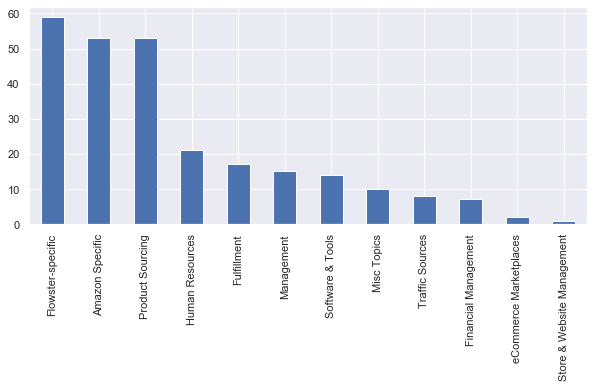

In [267]:
my_tags = ['Product Sourcing', 'Human Resources', 'Amazon Specific',
       'Flowster-specific', 'Software & Tools', 'Fulfillment',
       'Traffic Sources', 'Management', 'Misc Topics',
       'Financial Management', 'eCommerce Marketplaces',
       'Store & Website Management']
plt.figure(figsize=(10,4))
df.Category.value_counts().plot(kind='bar');

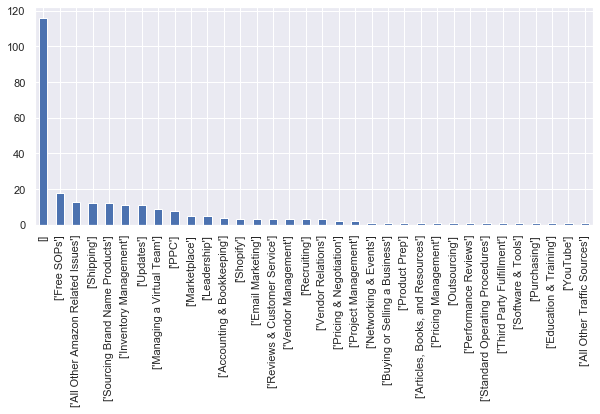

In [269]:
my_tags = [ "'Purchasing'", "'Sourcing Brand Name Products'",
       "'Vendor Management'", "'Pricing & Negotiation'",
       "'Vendor Relations'", "'Performance Reviews'", "'Recruiting'",
       "'Outsourcing'", "'Managing a Virtual Team'",
       "'Reviews & Customer Service'", "'PPC'", "'Inventory Management'",
       "'All Other Amazon Related Issues'", "'Pricing Management'",
       "'Software & Tools'", "'Product Prep'", "'Updates'", "'Free SOPs'",
       "'Marketplace'", "'Shopify'", "'Project Management'",
       "'Standard Operating Procedures'", "'Shipping'",
       "'Third Party Fulfillment'", "'Email Marketing'", "'YouTube'",
       "'All Other Traffic Sources'", "'Leadership'",
       "'Networking & Events'", "'Education & Training'",
       "'Buying or Selling a Business'",
       "'Articles, Books, and Resources'", "'Accounting & Bookkeeping'"]
plt.figure(figsize=(10,4))
df.Tags.value_counts().plot(kind='bar');

this shows that the maximum rows donot contain tags

In [11]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    
    return text
    
df['Leading_Comment'] = df['Leading_Comment'].apply(clean_text)
df.head(10)

,Topic_Title,Category,Tags,Author,Commenters,Leading_Comment,Other_Comments,Likes,Views
0,About the Product Sourcing Category,Product Sourcing,[],Trent-Admin,[],have questions about sourcing products this is...,[],0,0
1,Price Checker 2 - Competitor storefront extrac...,Product Sourcing,[],MoniqueAndKerry,['Mitch'],hi we are new to the forum and are going throu...,['Yes you will need the paid version. Options...,0,24
2,Top 10 Tips to Grow your Business Rapidly,Product Sourcing,['Purchasing'],Pradimna_Kumar,[],as i am working in amazon as a seller from las...,[],0,0
3,Virtual Assistants,Product Sourcing,[],JimW_PB,"['Rebca', 'McDavid', 'Mitch']",does anyone have a va they recommend have used...,['@McDavid Most don’t want to share any stella...,0,147
4,Can you sell branded products on Amazon uk,Product Sourcing,['Sourcing Brand Name Products'],Mitch,['Rameksuya'],can you sell branded products on amazon uk or ...,['You can sell on Amazon UK as well. It could...,0,73
5,Price Checker Sales Estimate,Product Sourcing,[],Mitch,['xinod14'],hi are yall still using pc2 for extracting sto...,['@xinod14 Are you seeing an inacurracy in a c...,0,101
6,Black Box (Amazon Product Research) - yay or nay?,Product Sourcing,[],zaid,['Mitch'],weve heard some good things about this tool pa...,['@zaid We use many of Helium10’s products. B...,0,87
7,VA’s vs Outbound Call Center,Product Sourcing,['Vendor Management'],Daniel_Folkmanas,[],anyone have experienced using an outbound call...,[],0,0
8,BO’s Contact Info Research Linkedin paid accou...,Product Sourcing,[],Cameron.B,"['zaid', 'LizD', 'Kane', 'Themachine', 'Mitch']",hello all i was hesitant to let my va sign int...,['You have to trust your VA to do so many thin...,2,189
9,Catalogs Analysis Best Practices,Product Sourcing,[],Adrian,"['Mitch', 'gianmeliShanghai']",hello all i found its a very lenghty process t...,['@gianmeliShanghai We typically analyze the p...,0,140


In [274]:
df['Leading_Comment'].apply(lambda x: len(x.split(' '))).sum()

19148

In [281]:
import gensim
from gensim.models import Word2Vec


#from itertools import islice
#list(islice(wv.vocab, 13030, 13050))

from sklearn.model_selection import train_test_split
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
import gensim
from gensim.models.doc2vec import TaggedDocument
import re
X = df.Leading_Comment
y = df.Category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
def label_sentences(corpus, label_type):
    """
    Gensim's Doc2Vec implementation requires each document/paragraph to have a label associated with it.
    We do this by using the TaggedDocument method. The format will be "TRAIN_i" or "TEST_i" where "i" is
    a dummy index of the post.
    """
    labeled = []
    for i, v in enumerate(corpus):
        label = label_type + '_' + str(i)
        labeled.append(doc2vec.TaggedDocument(v.split(), [label]))
    return labeled
X_train, X_test, y_train, y_test = train_test_split(df.Leading_Comment, df.Category, random_state=0, test_size=0.3)
X_train = label_sentences(X_train, 'Train')
X_test = label_sentences(X_test, 'Test')
all_data = X_train + X_test

In [283]:
pip install testfixtures

Note: you may need to restart the kernel to use updated packages.


In [284]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


%%time

import gensim
from gensim.models.doc2vec import TaggedDocument
from collections import namedtuple

import gensim
#let X be a list of tokenized texts (i.e. list of lists of tokens)
model = gensim.models.Word2Vec(X, size=100)
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

a dictionary mapping word -> 100-dimensional vector. Now we can use it to build features. The simplest way to do that is by averaging word vectors for all words in a text. We will build a sklearn-compatible transformer that is initialised with a word -> vector dictionary.

class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

class TfidfEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        self.dim = len(word2vec.itervalues().next())

    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # if a word was never seen - it must be at least as infrequent
        # as any of the known words - so the default idf is the max of 
        # known idf's
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf,
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])

        return self

    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier

etree_w2v = Pipeline([
    ("word2vec vectorizer", MeanEmbeddingVectorizer(w2v)),
    ("extra trees", ExtraTreesClassifier(n_estimators=200))])
etree_w2v_tfidf = Pipeline([
    ("word2vec vectorizer", TfidfEmbeddingVectorizer(w2v)),
    ("extra trees", ExtraTreesClassifier(n_estimators=200))])

In [291]:
import os
import nltk

import gensim


FileNotFoundError: [WinError 3] The system cannot find the path specified: '../input/embeddings/GoogleNews-vectors-negative300/'

In [326]:
from gensim.models import word2vec
import os
print(os.listdir("../input/embeddings/GoogleNews-vectors-negative300/"))

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../input/embeddings/GoogleNews-vectors-negative300/'

In [294]:
nltk(nltk.download('all'))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzip

TypeError: 'module' object is not callable

%matplotlib inline

# Data wrapper libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.markers import MarkerStyle
import seaborn as sns

# Text analysis helper libraries
from gensim.summarization import summarize
from gensim.summarization import keywords
# Text analysis helper libraries for word frequency etc..
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

# Word cloud visualization libraries
#from scipy.misc import imresize
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from collections import Counter

# Word2Vec related libraries
from gensim.models import KeyedVectors

# Dimensionaly reduction libraries
from sklearn.decomposition import PCA

# Clustering library
from sklearn.cluster import KMeans

# Set figure size a bit bigger than default so everything is easily red
plt.rcParams["figure.figsize"] = (11, 7)

In [33]:
#stop_words = set(stopwords.words('english') + list(punctuation) + custom_words)
#wordnet_lemmatizer = WordNetLemmatizer()

class_corpus = df.groupby('Category').apply(lambda x: x['Leading_Comment'].str.cat())


In [34]:
class_corpus

Category
Amazon Specific               have questions about using the amazon marketpl...
Financial Management          have questions about financial management this...
Flowster-specific             discussion about flowster this forums organiza...
Fulfillment                   have questions about fulfillment this is the c...
Human Resources               have questions about human resources this is t...
Management                    have questions about management this is the ca...
Misc Topics                   have questions about things that dont fall und...
Product Sourcing              have questions about sourcing products this is...
Software & Tools              have questions about software  tools this is t...
Store & Website Management    have questions about store  website management...
Traffic Sources               have questions about generating traffic please...
eCommerce Marketplaces        have questions about sourcing the various sale...
dtype: object

brew install wget

wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

from gensim import models

w = models.KeyedVectors.load_word2vec_format(
    '../GoogleNews-vectors-negative300.bin', binary=True)

def get_average_vector(text):
    tokens = [w.lower() for w in word_tokenize(text) ]
    return np.mean(np.array([model.wv[w] for w in tokens if w in model]), axis=0)

model.wv.similar_by_vector(get_average_vector(df.loc[0, 'Leading_Comment']))

def get_average_vector(text):
    tokens = [w.lower() for w in word_tokenize(text) if w.lower() not in stop_words]
    return np.mean(np.array([model.wv[w] for w in tokens if w in model]), axis=0)

model.wv.similar_by_vector(get_average_vector(df.loc[0, 'Text']))

kmeans = KMeans(n_clusters=9).fit(vecs)
c_labels = kmeans.labels_

fig, ax = plt.subplots()

cm = plt.get_cmap('jet', 9)
colors = [cm(i/9) for i in range(9)]
ax.scatter(reduced_vecs[:,0], reduced_vecs[:,1], c=[colors[c-1] for c in c_labels], cmap='jet', s=8)

plt.legend(handles=[Patch(color=colors[i], label='Class {}'.format(i+1)) for i in range(9)])

plt.show()

In [ ]:
#df['Leading_Comment'] = df['Leading_Comment'].str.replace('',',')

In [295]:
import nltk
import gensim
from nltk.corpus import abc

model= gensim.models.Word2Vec(abc.sents())
X= list(model.wv.vocab)
data=model.most_similar('science')
print(data)

[('law', 0.9392492175102234), ('agriculture', 0.9295176267623901), ('policy', 0.9276021718978882), ('media', 0.9252246022224426), ('general', 0.9244136810302734), ('practice', 0.9159464836120605), ('discussion', 0.9143593311309814), ('Crean', 0.9114880561828613), ('board', 0.9098367094993591), ('Cooper', 0.9082885384559631)]


C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  import sys


In [72]:
#creating word corpus
# Select features from original dataset to form a new dataframe 
df1 = df[['Author','Topic_Title','Category']]
# For each row, combine all the columns into one column
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1)
# Store them in a pandas dataframe
df_clean = pd.DataFrame({'clean': df2})
# Create the list of list format of the custom corpus for gensim modeling 
sent = [row.split(',') for row in df_clean['clean']]
#finallist = [ ", ".join(item.split(" ")) for item in sent ]
# show the example of list of list format of the custom corpus for gensim modeling 
sent[:2]

[['Trent-Admin', 'About the Product Sourcing Category', 'Product Sourcing'],
 ['MoniqueAndKerry',
  'Price Checker 2 - Competitor storefront extraction',
  'Product Sourcing']]

In [51]:
# Select features from original dataset to form a new dataframe 
df1 = df['Leading_Comment']
# For each row, combine all the columns into one column
#df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1)
# Store them in a pandas dataframe
df_clean = pd.DataFrame({'clean': df1})
# Create the list of list format of the custom corpus for gensim modeling 
sent1 = [row.split(',') for row in df_clean['clean']]
#finallist = [ ", ".join(item.split(" ")) for item in sent ]
# show the example of list of list format of the custom corpus for gensim modeling 
sent1[:2]

[['have questions about sourcing products this is the category to use please be sure to select the most appropriate subcategory for your questions'],
 ['hi we are new to the forum and are going through the product sourcing for professionals sops we have a question on the product extraction workflow process using pc2 we have downloaded the free version and it doesnt have the button that says amazon browsersearches do we need to purchase the full pc2 package to get this feature thanks for your help in advance']]

gensim.utils.simple_preprocess(sent, deacc=False, min_len=2, max_len=100)

In [59]:
from nltk.tokenize import word_tokenize

tokenized_sents = [word_tokenize(i) for i in df.Leading_Comment]
for i in tokenized_sents:
    print (i)


['have', 'questions', 'about', 'sourcing', 'products', 'this', 'is', 'the', 'category', 'to', 'use', 'please', 'be', 'sure', 'to', 'select', 'the', 'most', 'appropriate', 'subcategory', 'for', 'your', 'questions']
['hi', 'we', 'are', 'new', 'to', 'the', 'forum', 'and', 'are', 'going', 'through', 'the', 'product', 'sourcing', 'for', 'professionals', 'sops', 'we', 'have', 'a', 'question', 'on', 'the', 'product', 'extraction', 'workflow', 'process', 'using', 'pc2', 'we', 'have', 'downloaded', 'the', 'free', 'version', 'and', 'it', 'doesnt', 'have', 'the', 'button', 'that', 'says', 'amazon', 'browsersearches', 'do', 'we', 'need', 'to', 'purchase', 'the', 'full', 'pc2', 'package', 'to', 'get', 'this', 'feature', 'thanks', 'for', 'your', 'help', 'in', 'advance']
['as', 'i', 'am', 'working', 'in', 'amazon', 'as', 'a', 'seller', 'from', 'last', '6', 'years', 'do', 'you', 'want', 'some', 'tips', 'for', 'selling', 'and', 'growing', 'your', 'business', 'fastly', 'like', 'how', 'i', 'grow', 'my', 

In [73]:
#training the model
import os
import gensim
from gensim import models
from gensim.models import Word2Vec, KeyedVectors
model = Word2Vec(sent, min_count=1,size= 150,workers=3, window =10, sg = 1)
model.train(sent,total_examples=len(sent),epochs=10)

(4378, 7840)

Default min_count in gensim's Word2Vec is set to 5. If there is no word in your vocab with frequency greater than 4, your vocab will be empty and hence the error. Try

voc_vec = word2vec.Word2Vec(vocab, min_count=1)

In [74]:
w1 = "Product Sourcing"
model.wv.most_similar (positive=w1)

[('Fulfillment', 0.4485933780670166),
 ('Amazon Specific', 0.37647929787635803),
 ('Human Resources', 0.3363603353500366),
 ('Software & Tools', 0.32545027136802673),
 ('Flowster-specific', 0.2931692600250244),
 ('Kane', 0.2916395664215088),
 ('Misc Topics', 0.2869913876056671),
 ('Trent-Admin', 0.2701694369316101),
 ('Financial Management', 0.2574438452720642),
 ('“4 stars and above” Sponsored Ads?', 0.25362709164619446)]

In [75]:
# look up top 6 words similar to 'Management'
w1 = ["Management"]
model.wv.most_similar (positive=w1,topn=6)

[('Mitch', 0.31982216238975525),
 ('Flowster-specific', 0.28371956944465637),
 ('Misc Topics', 0.26642224192619324),
 ('What software do you use to help optimize Amazon Sponsored Products ads?',
  0.22899824380874634),
 ('Amazon Specific', 0.2146243155002594),
 ('Mac', 0.2119842767715454)]

In [76]:
w1 = ["Trent-Admin"]
model.wv.most_similar (positive=w1,topn=6)

[('Flowster-specific', 0.2745056748390198),
 ('Product Sourcing', 0.2701694965362549),
 ('Fulfillment', 0.2621493935585022),
 ('VA using PC2 & Revseller', 0.25910812616348267),
 ('Matoskah', 0.2522522211074829),
 ('dast1983', 0.23811905086040497)]

In [64]:
import os
import gensim
from gensim import models
from gensim.models import Word2Vec, KeyedVectors
model = Word2Vec(sent1, min_count=1,size= 150,workers=3, window =10, sg = 1)
model.train(sent1,total_examples=len(sent1),epochs=10)

(2028, 2600)

In [328]:
model['Product Sourcing']

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.00858252, -0.00565794,  0.00543655,  0.00895941, -0.00475947,
        0.00595463,  0.00688389,  0.00424513,  0.00364688, -0.00839514,
       -0.00986124, -0.0037087 ,  0.0051629 ,  0.00884158,  0.0001641 ,
        0.00678965,  0.00508302, -0.00047206,  0.01013079, -0.00851968,
       -0.0084752 ,  0.00882965, -0.00752108,  0.00617096, -0.00810367,
       -0.00430182, -0.00597758,  0.00835946,  0.00046524,  0.00764807,
        0.00178939,  0.00180292,  0.00476037, -0.0013844 ,  0.00358532,
       -0.00969123,  0.00762332, -0.0064407 ,  0.00839675, -0.00228404,
        0.00050175,  0.00574061, -0.0093417 ,  0.00220678,  0.00520945,
        0.00884781, -0.0012358 , -0.00727574, -0.00764251,  0.00320707],
      dtype=float32)

In [77]:
# similarity between two different words
model.wv.similarity(w1="Trent-Admin",w2="Product Sourcing")

0.27016944

computes the cosine similarity between the two specified words using word vectors of each

In [329]:
model['have questions about sourcing products this is the category to use please be sure to select the most appropriate subcategory for your questions']

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 8.6958101e-03, -2.6738541e-03, -2.1861121e-03, -1.8729513e-03,
        4.6720384e-03,  9.6677616e-03,  7.9306290e-03, -5.3473623e-03,
        3.7879504e-03, -4.1347654e-03,  8.3414493e-03, -3.6445684e-03,
       -7.4183885e-03, -5.3358972e-03, -7.8470232e-03, -9.7973105e-03,
       -2.4052726e-03,  2.4894989e-04,  1.7690565e-03,  6.1635575e-03,
       -6.3941898e-03, -2.1318921e-03,  9.7553967e-04,  7.0560169e-03,
       -1.2186413e-05, -7.6340395e-03,  3.3847191e-03,  2.2959432e-03,
        7.6478021e-03, -3.1170056e-03, -4.9530743e-03, -6.4338520e-03,
        1.6229893e-03,  4.7263931e-03,  7.5563043e-03, -1.8108663e-03,
        3.9747301e-03,  6.9524501e-03, -3.8129073e-03,  1.4122400e-03,
       -9.2318654e-03,  2.2648347e-03, -3.1472098e-03, -5.6710350e-03,
        9.1452140e-04, -3.9458252e-03, -7.3911077e-03, -8.6641107e-03,
        6.3519608e-03,  7.4004573e-03], dtype=float32)

In [78]:
bigger_list=[]
for i in df['Leading_Comment']:
    li = list(i.split(" "))
    bigger_list.append(li)
#structure of data to be taken by the model.word2vec
print("Data format for the overall list:",bigger_list)


Data format for the overall list: [['have', 'questions', 'about', 'sourcing', 'products', 'this', 'is', 'the', 'category', 'to', 'use', 'please', 'be', 'sure', 'to', 'select', 'the', 'most', 'appropriate', 'subcategory', 'for', 'your', 'questions'], ['hi', 'we', 'are', 'new', 'to', 'the', 'forum', 'and', 'are', 'going', 'through', 'the', 'product', 'sourcing', 'for', 'professionals', 'sops', 'we', 'have', 'a', 'question', 'on', 'the', 'product', 'extraction', 'workflow', 'process', 'using', 'pc2', 'we', 'have', 'downloaded', 'the', 'free', 'version', 'and', 'it', 'doesnt', 'have', 'the', 'button', 'that', 'says', 'amazon', 'browsersearches', 'do', 'we', 'need', 'to', 'purchase', 'the', 'full', 'pc2', 'package', 'to', 'get', 'this', 'feature', 'thanks', 'for', 'your', 'help', 'in', 'advance'], ['as', 'i', 'am', 'working', 'in', 'amazon', 'as', 'a', 'seller', 'from', 'last', '6', 'years', 'do', 'you', 'want', 'some', 'tips', 'for', 'selling', 'and', 'growing', 'your', 'business', 'fastly

In [79]:
#custom data is fed to machine for further processing
model23= Word2Vec(bigger_list, min_count=1,size=300,workers=4)
#print(model)

In [81]:
print(model23)

Word2Vec(vocab=2755, size=300, alpha=0.025)


In [84]:
#check for similar words
similar_words = model23.most_similar('increase')
print(similar_words)

[('at', 0.9985271096229553), ('other', 0.9985159635543823), ('with', 0.9985157251358032), ('an', 0.9985156655311584), ('would', 0.99851393699646), ('it', 0.9985126256942749), ('you', 0.998512327671051), ('out', 0.9985105991363525), ('me', 0.9985105395317078), ('product', 0.9985103607177734)]


C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [86]:
similarity_two_words = model23.similarity('amazon','va')
print("Please provide the similarity between these two words:")
print(similarity_two_words)

Please provide the similarity between these two words:
0.99991935


C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


from sklearn.metrics.pairwise import cosine_similarity
def get_cosine_similarity(feature_vec_1, feature_vec_2):    
    return cosine_similarity(feature_vec_1.reshape(1, -1), feature_vec_2.reshape(1, -1))[0][0]

In [347]:
X = df.Leading_Comment
y = df.Category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [13]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

In [14]:
#from gensim.models import Word2Vec
#wv = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)

In [304]:
#vector_path = r"word_vectors\GoogleNews-vectors-negative300.bin"
vector_path=r"https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

model = KeyedVectors.load_word2vec_format (vector_path, binary=True)
model.wv.similar_by_word('me')

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


[('us', 0.7223873138427734),
 ('him', 0.7099882364273071),
 ('I', 0.6996651291847229),
 ('myself', 0.6886329054832458),
 ('my', 0.6557403206825256),
 ('somebody', 0.6481153964996338),
 ('really', 0.6184217929840088),
 ('them', 0.6003026962280273),
 ('ÔI', 0.5879040360450745),
 ('everybody', 0.5867087841033936)]

from itertools import islice
list(islice(wv.vocab, 13030, 13050))

In [15]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, df):
    return np.vstack([word_averaging(wv, Leading_Comment) for Leading_Comment in df ])

In [18]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [30]:
df['Leading_Comment'] = df['Leading_Comment'].apply(str) 

In [32]:
from sklearn.model_selection import train_test_split
import nltk
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens
    
train, test = train_test_split(df, test_size=0.3)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['Leading_Comment']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['Leading_Comment']), axis=1).values

#df['Leading_Comment1'] = df['Leading_Comment'].apply(w2v_tokenize_text) 
#df['Text'].apply(word_tokenize)
X_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

NameError: name 'Leading_Comment' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train['Leading_Comment'])
y_pred = logreg.predict(X_test_word_average)
print('accuracy %s' % accuracy_score(y_pred, test.tags))
print(classification_report(test.tags, y_pred,target_names=my_tags))

In [ ]:
def read_input(input_file):
    """This method reads the input file which is in gzip format"""
    
    logging.info("reading file {0}...this may take a while".format(input_file))
    
    with gzip.open (input_file, 'rb') as f:
        for i, line in enumerate (f): 

            if (i%10000==0):
                logging.info ("read {0} reviews".format (i))
            # do some pre-processing and return a list of words for each review text
            yield gensim.utils.simple_preprocess (line)

# read the tokenized reviews into a list
# each review item becomes a serries of words
# so this becomes a list of lists
documents = list (read_input (class_corpus))
logging.info ("Done reading data file")

def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
close_words = model.similar_by_word(word)
arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()
>>> display_closestwords_tsnescatterplot(model, 'Porsche 718 Cayman', 50) 

In [ ]:
import numpy as np
from scipy import spatial

index2word_set = set(model.wv.index2word)

def avg_feature_vector(sentence, model, num_features, index2word_set):
    words = sentence.split()
    feature_vec = np.zeros((num_features, ), dtype='float32')
    n_words = 0
    for word in words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model[word])
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

In [ ]:
s1_afv = avg_feature_vector('this is a sentence', model=model, num_features=300, index2word_set=index2word_set)
s2_afv = avg_feature_vector('this is also sentence', model=model, num_features=300, index2word_set=index2word_set)
sim = 1 - spatial.distance.cosine(s1_afv, s2_afv)
print(sim)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from typing import List

# see spacy_sentence2vec.py for an example usage with real language inputs


# an embedding word with associated vector
class Word:
    def __init__(self, text, vector):
        self.text = text
        self.vector = vector

    def __str__(self):
        return self.text + ' : ' + str(self.vector)

    def __repr__(self):
        return self.__str__()


# a sentence, a list of words
class Sentence:
    def __init__(self, word_list):
        self.word_list = word_list

    # return the length of a sentence
    def len(self) -> int:
        return len(self.word_list)

    def __str__(self):
        word_str_list = [word.text for word in self.word_list]
        return ' '.join(word_str_list)

    def __repr__(self):
        return self.__str__()


# todo: get a proper word frequency for a word in a document set
# or perhaps just a typical frequency for a word from Google's n-grams
def get_word_frequency(word_text):
    return 0.0001  # set to a low occurring frequency - probably not unrealistic for most words, improves vector values


# A SIMPLE BUT TOUGH TO BEAT BASELINE FOR SENTENCE EMBEDDINGS
# Sanjeev Arora, Yingyu Liang, Tengyu Ma
# Princeton University
# convert a list of sentence with word2vec items into a set of sentence vectors
def sentence_to_vec(sentence_list: List[Sentence], embedding_size: int, a: float=1e-3):
    sentence_set = []
    for sentence in sentence_list:
        vs = np.zeros(embedding_size)  # add all word2vec values into one vector for the sentence
        sentence_length = sentence.len()
        for word in sentence.word_list:
            a_value = a / (a + get_word_frequency(word.text))  # smooth inverse frequency, SIF
            vs = np.add(vs, np.multiply(a_value, word.vector))  # vs += sif * word_vector

        vs = np.divide(vs, sentence_length)  # weighted average
        sentence_set.append(vs)  # add to our existing re-calculated set of sentences

    # calculate PCA of this sentence set
    pca = PCA()
    pca.fit(np.array(sentence_set))
    u = pca.components_[0]  # the PCA vector
    u = np.multiply(u, np.transpose(u))  # u x uT

    # pad the vector?  (occurs if we have less sentences than embeddings_size)
    if len(u) < embedding_size:
        for i in range(embedding_size - len(u)):
            u = np.append(u, 0)  # add needed extension for multiplication below

    # resulting sentence vectors, vs = vs -u x uT x vs
    sentence_vecs = []
    for vs in sentence_set:
        sub = np.multiply(u,vs)
        sentence_vecs.append(np.subtract(vs, sub))

    return sentence_vecs


In [ ]:
T-SNE Visualizations
It’s hard to visualize the word embedding directly, for they usually have more than 3 dimensions. T-SNE is a useful tool to visualize high-dimensional data by dimension reduction while keeping relative pairwise distance between points. It can be said that T-SNE looking for a new data representation where the neighborhood relations are preserved. The following code shows how to plot the word embedding with T-SNE plot.
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
close_words = model.similar_by_word(word)
arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()
>>> display_closestwords_tsnescatterplot(model, 'Porsche 718 Cayman', 50) 

In [ ]:
#fixing the classifier to a test train split
from sklearn.ensemble import RandomTreeClassifier
model4= RandomForestClassifier( n_estimators=100, criterion=entropy,random_state=0)
model.train(X_train, y_train)


In [ ]:
y_pred=model.fit(X_test)


#dilbert model